In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk

### Import HARPs Data as Dataframe

In [148]:
filepath = '../harps/rvs.dat'
#headers = [Target,RAdeg,DEdeg,BJD,DRVmlcnzp,e_DRVmlcnzp,RVdrsnzp,e_RVdrsnzp,DRVmlc,e_DRVmlc,RVdrs,e_RVdrs,DRVmlcj,e_DRVmlcj,CRX,e_CRX,dLW,e_dLW,Halpha,e_Halpha,NaD1,e_NaD1,NaD2,e_NaD2,Flag,FHWMDRS,Contrast,BIS,RVguess,SNRDRS,BJDDRS,BERV,BERVDRS,DRIFT,e_DRIFT,SA,NZPmlc,dNZPmlc,NZPdrs,dNZPdrs,TMmean,ExpTime,MLCRX,e_MLCRX,TimeId,DriftLamp,Mask,ProgID,]
cols = [
    "Target","RAdeg","DEdeg","BJD",
    "DRVmlcnzp","e_DRVmlcnzp",
    "RVdrsnzp","e_RVdrsnzp",
    "DRVmlc","e_DRVmlc",
    "RVdrs","e_RVdrs",
    "DRVmlcj","e_DRVmlcj",
    "CRX","e_CRX",
    "dLW","e_dLW",
    "Halpha","e_Halpha",
    "NaD1","e_NaD1",
    "NaD2","e_NaD2",
    "Flag",
    "FWHMDRS","Contrast","BIS","RVguess",
    "SNRDRS","BJDDRS",
    "BERV","BERVDRS",
    "DRIFT","e_DRIFT",
    "SA",
    "NZPmlc","dNZPmlc",
    "NZPdrs","dNZPdrs",
    "TMmean","ExpTime",
    "MLCRX","e_MLCRX",
    "TimeId","DriftLamp","Mask",
    "ProgID","ProgPI","OBHAB","THARFP","DPRTYPE",
    "RHKp","e_RHKp","vsinflag","metflag","Sourceflag"
]
data = pd.read_csv(filepath, delim_whitespace=True, names=cols)
print(data)


/var/folders/bq/jb6ywbx523xg77w6zn_yf6s00000gn/T/ipykernel_17030/2085411919.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filepath, delim_whitespace=True, names=cols)


          Target       RAdeg      DEdeg           BJD    DRVmlcnzp  \
0       HD160617  265.706979 -40.322215  2.454900e+06  2.05500e+00   
1       HD160617  265.706979 -40.322215  2.454901e+06  5.28158e+00   
2       HD160617  265.706979 -40.322215  2.454901e+06  2.49251e+00   
3       HD160617  265.706979 -40.322215  2.454901e+06  5.69970e+00   
4       HD160617  265.706979 -40.322215  2.454901e+06  1.49774e+00   
...          ...         ...        ...           ...          ...   
252610   WASP-98   58.428836 -34.328218  2.458449e+06     -27.2518   
252611   WASP-98   58.428836 -34.328218  2.458449e+06     -132.226   
252612   WASP-98   58.428836 -34.328218  2.458449e+06     -66.0682   
252613   WASP-98   58.428836 -34.328218  2.458449e+06      5.54856   
252614   WASP-98   58.428836 -34.328218  2.458449e+06     -39.8801   

       e_DRVmlcnzp              RVdrsnzp e_RVdrsnzp     DRVmlc  e_DRVmlc  ...  \
0         1.624905   1.0060936406500e+05   1.322757    7.79633  1.443621  ... 

/var/folders/bq/jb6ywbx523xg77w6zn_yf6s00000gn/T/ipykernel_17030/2085411919.py:29: DtypeWarning: Columns (1,2,4,5,6,9,10,13,25,26,27,33,35,36,37,38,39,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath, delim_whitespace=True, names=cols)


In [149]:
targetdata = data[data["Target"]=='HD209458']
targetdata = targetdata.astype({"BJD":float, "RHKp":float, "e_RHKp":float})
print(targetdata['RHKp'].dtypes,targetdata['e_RHKp'].dtypes)

float64 float64


In [150]:
targetdata.columns

Index(['Target', 'RAdeg', 'DEdeg', 'BJD', 'DRVmlcnzp', 'e_DRVmlcnzp',
       'RVdrsnzp', 'e_RVdrsnzp', 'DRVmlc', 'e_DRVmlc', 'RVdrs', 'e_RVdrs',
       'DRVmlcj', 'e_DRVmlcj', 'CRX', 'e_CRX', 'dLW', 'e_dLW', 'Halpha',
       'e_Halpha', 'NaD1', 'e_NaD1', 'NaD2', 'e_NaD2', 'Flag', 'FWHMDRS',
       'Contrast', 'BIS', 'RVguess', 'SNRDRS', 'BJDDRS', 'BERV', 'BERVDRS',
       'DRIFT', 'e_DRIFT', 'SA', 'NZPmlc', 'dNZPmlc', 'NZPdrs', 'dNZPdrs',
       'TMmean', 'ExpTime', 'MLCRX', 'e_MLCRX', 'TimeId', 'DriftLamp', 'Mask',
       'ProgID', 'ProgPI', 'OBHAB', 'THARFP', 'DPRTYPE', 'RHKp', 'e_RHKp',
       'vsinflag', 'metflag', 'Sourceflag'],
      dtype='object')

### Plot Ca H&K Relative Emission as Function of Time (BJD)

In [151]:
np.unique(targetdata['BJD'])

array([2453261.5261101, 2453261.5281677, 2453261.5302192, 2453305.5998796,
       2453305.6086534, 2453305.6171798, 2453306.5608196, 2453306.5641157,
       2453306.5673251, 2453600.725436 , 2453600.73363  , 2453600.7425726,
       2453606.7091448, 2453607.7156985, 2453608.6949829, 2453872.9025616,
       2453872.9059962, 2453872.9095919, 2455522.5128512])

In [152]:
#fig, ax = plt.subplots()
#ax.scatter(x=targetdata['BJD'], y=targetdata['NaD2'])
#ax.set_yscale('log')

In [176]:
targetdata['RHKp']
#targetdata['BJD'].astype(int)

190347   -4.748625e+133
190348   -4.702921e+240
190349   -1.712576e-138
190350   -1.205677e-281
190351    9.259954e+260
190352    5.343822e-189
190353   -2.945717e+252
190354     1.279973e+92
190355    8.544325e-301
190356   -7.784841e-295
190357    2.303504e-181
190358   -5.042943e+255
190359    -2.739829e+79
190360   -4.663840e-103
190361    -4.197349e-17
190362     1.012207e+69
190363   -6.776685e-134
190364    1.794564e-283
190365   -2.974180e+299
Name: RHKp, dtype: float64

In [173]:
len(targetdata['BJD'][:-1])

18

(-1e+200, 9.259954044827485e+260)

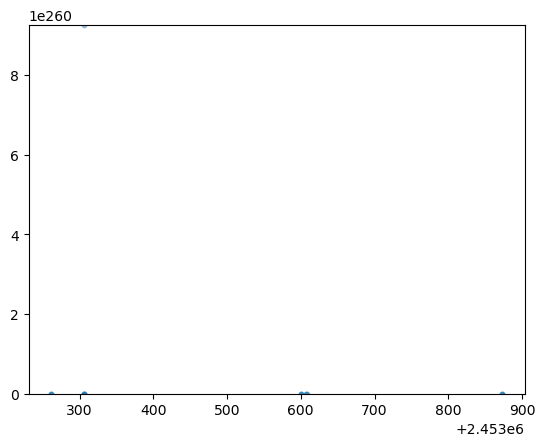

In [183]:
fig, ax = plt.subplots()

ax.scatter(x=targetdata['BJD'][:-1], y=targetdata['RHKp'][:-1],s=10,alpha=0.4)
#ax.set_yscale('log')
ax.set_ylim(-1e200, targetdata['RHKp'][:-1].max())
#ax.set_yticks([1e-300, 1e-200, 1e-100, 1, 1e100, 1e200,1e300])
#ax.set_yticklabels([1e-300,1e-200, 1e-100, 1, 1e100, 1e200,1e300])

In [155]:
planet_pd = 3.5247 #days; value from exoplanet archive

t0 = targetdata['BJD'].values[0]
phase = ((targetdata['BJD']-t0) % planet_pd) #phase-fold time data 
print(phase[:-1])

190347    0.000000
190348    0.002058
190349    0.004109
190350    1.777370
190351    1.786143
190352    1.794670
190353    2.738309
190354    2.741606
190355    2.744815
190356    0.828126
190357    0.836320
190358    0.845262
190359    3.287135
190360    0.768988
190361    1.748273
190362    1.603351
190363    1.606786
190364    1.610382
Name: BJD, dtype: float64


In [166]:
lightcurve = lk.LightCurve(flux=targetdata['RHKp'][:-1],time=targetdata['BJD'][:-1])
folded = lightcurve.fold(planet_pd)

<Axes: xlabel='Time [JD]', ylabel='Flux'>

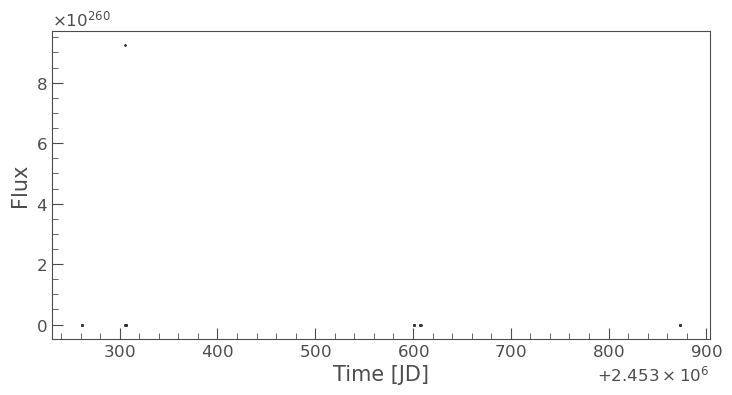

In [184]:
lightcurve.scatter()

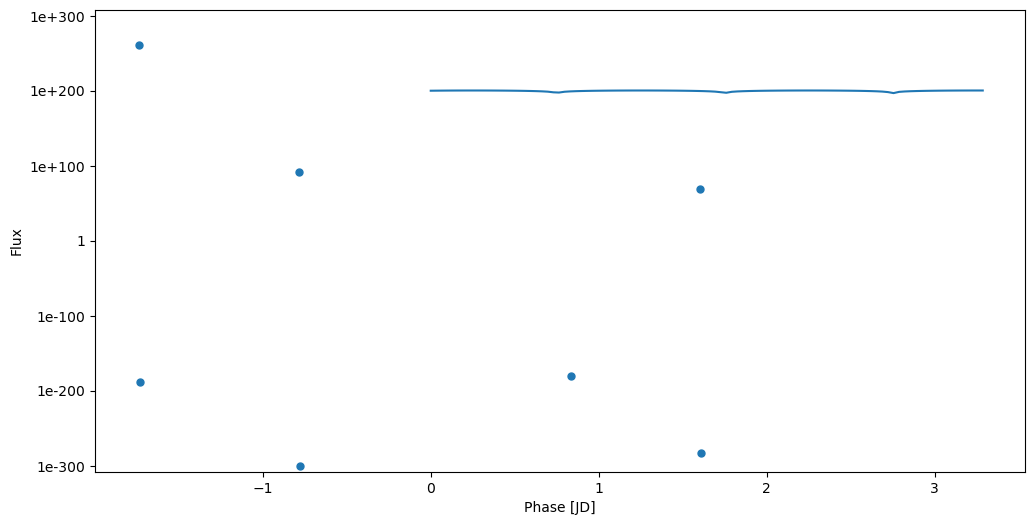

In [167]:
x=np.linspace(0,phase.max(),100)
A = 1E200
#y=A*np.sin(x)

fig, ax = plt.subplots(figsize=(12, 6))
#ax.errorbar(phase, flux, yerr=flux_err, fmt='o', ecolor='lightgray', markersize=3, elinewidth=1, capsize=3, label = 'Original Data')
folded.scatter(ax=ax,s=100)#, s=3, label = 'Original Data')
ax.set_yscale('log')
ax.set_ylim(1e-308, 1e308)
#ax.set_xlim(1.5,2.0)
ax.set_yticks([1e-300, 1e-200, 1e-100, 1, 1e100, 1e200,1e300])
ax.set_yticklabels([1e-300,1e-200, 1e-100, 1, 1e100, 1e200,1e300])
ax.plot(x,A*np.sin(2*np.pi*x)+1e200)
#ax.set_xlabel('Phase')
#ax.set_ylabel('Relative Flux')
#ax.legend()

/var/folders/bq/jb6ywbx523xg77w6zn_yf6s00000gn/T/ipykernel_17030/2995057574.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(-100000000, 10000)


(np.float64(0.002357560676195342), 10000)

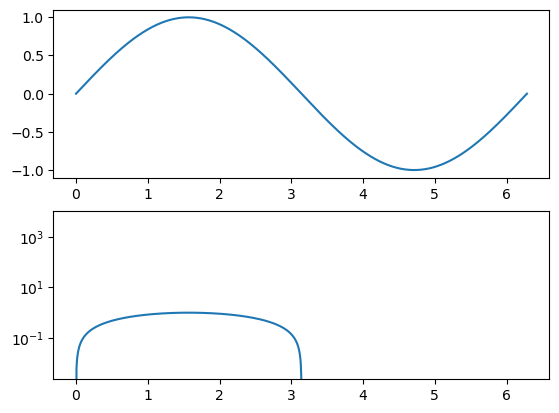

In [158]:
xaxis = np.linspace(0,2*np.pi,1000)
yaxis = np.sin(xaxis)
fig,ax = plt.subplots(2,1)
ax[0].plot(xaxis,yaxis)
ax[1].plot(xaxis,yaxis)
ax[1].set_yscale('log')
ax[1].set_ylim(-100000000, 10000)